In [ ]:
from google.colab import files
uploaded = files.upload()

Saving creditcard.csv.zip to creditcard.csv.zip


In [ ]:
import zipfile
import os

with zipfile.ZipFile('creditcard.csv.zip', 'r') as zip_ref:
    zip_ref.extractall('unzipped_data')


In [ ]:
import pandas as pd
df = pd.read_csv('unzipped_data/creditcard.csv')
X = df.drop('Class', axis=1)
y = df['Class']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42, stratify=y)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
from sklearn.svm import SVC, LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [ ]:
linear_svc = make_pipeline(
    StandardScaler(),
    LinearSVC(random_state=42, max_iter=10000)
)
linear_svc.fit(X_train, y_train)
linear_acc = linear_svc.score(X_test, y_test)
print("LinearSVC accuracy:", linear_acc)

LinearSVC accuracy: 0.9990871107053826


In [ ]:
rbf_svc = make_pipeline(
    StandardScaler(),
    SVC(kernel='rbf', random_state=42, max_iter=10000)
)
rbf_svc.fit(X_train, y_train)
rbf_acc = rbf_svc.score(X_test, y_test)
print("RBF kernel SVC accuracy:", rbf_acc)

RBF kernel SVC accuracy: 0.999420666409185


In [9]:
poly_svc = make_pipeline(
    StandardScaler(),
    SVC(kernel='poly', degree=3, random_state=42, max_iter=10000)
)
poly_svc.fit(X_train, y_train)
poly_acc = poly_svc.score(X_test, y_test)
print("Polynomial kernel SVC accuracy:", poly_acc)

/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Polynomial kernel SVC accuracy: 0.9994382219725431


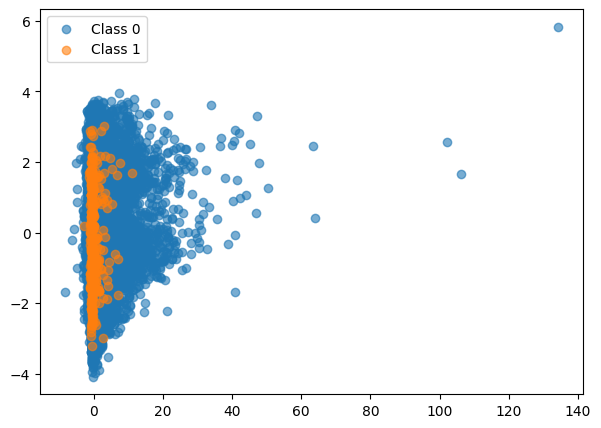

In [10]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)
plt.figure(figsize=(7,5))

for c in range(len(set(y_train))):
    plt.scatter(X_pca[y_train==c, 0], X_pca[y_train==c, 1], label=f'Class {c}', alpha=0.6)
plt.legend()
plt.show()
